# Introduction


# Dataset Description

  - Contains data of 248,218 medical drugs from global manufacturers.
  - Includes drug names, active ingredients, therapeutic class, Habit Forming, side effects, and Action Class.
  - 5 substitute columns for each drug.
  - 42 side effects columns (some may be blank).
  - 5 usage columns.
  - Other columns provide specific drug information.

- **Substitutes:**
  - Helps consumers find alternative medicines with the same composition but from different manufacturers.
  - Provides 5 substitutes for each drug/medicine.

- **Therapeutic Class:**
  - Classifies medications based on their functions.
  - Medications in the same class treat similar medical conditions.
  - Examples include the "Respiratory" class.

- **Action Class:**
  - Classifies medications based on the actions they perform.
  - For instance, "H2 Receptor Blocker" blocks H2 receptors to decrease gastric acid secretion.

- **Chemical Class:**
  - Groups medications based on the chemical compounds they contain.

- **Habit Forming:**
  - Indicates whether a drug has the potential for habit formation.
  - Classified as YES (habit-forming) or NO (non-habit-forming).

## Description of the Problem

For this assignment, I will utilize popular Python libraries such as NumPy, pandas, matplotlib, and seaborn. Additionally, I will incorporate several other libraries that are built upon these foundational ones. The medicine dataset has been specifically curated for research purposes.

Within the scope of this assignment, I will address several key questions using statistical analysis of the dataset and Visualize these results:

1. What is the proportion of habit-forming medicines to non-habit forming medicines?
3. To which Chemical Class do habit-forming medicines belong?
5. What are the most prevalent side effects induced by these medicines?
6. Identify and list the top 10 most common side effects.
7. Determine the most frequent use case for these medicines.
8. List the 10 most common substitutes used for these medicines.
9. Calculate the number of drugs within each Therapeutic Class.
10. Calculate the number of drugs within each Chemical Class.
11. Calculate the number of drugs within each Action Class.


# Loading Dataset

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format  # Display numbers with 2 decimal places

# Load Data
data = pd.read_csv("dataset/medicine_dataset.csv")
display(data.head())
# display(data.tail(10))

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


# Overview of Dataset Variables and Summary Statistics

## 1. Dataset size

In [3]:
# Check the number of attriutes and instances in the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns \n')

attribute_names = data.columns

# print("Attribute Names:")
# for name in attribute_names:
#     print(name)


There are 248218 rows and 58 columns 



## 2. Dataset  Description

In [4]:
# Check the data types of each column
print("Data types:\n", data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

## 3. Dataset Statistics

In [5]:
# Setting max column width to avoid truncation of column names
pd.set_option('max_colwidth', 100)

# Creating an empty DataFrame
data_descpt = pd.DataFrame()

# Total number of Parameters (columns) in the dataset
data_descpt["Total Number of Parameters"] = [data.shape[1]]

# Checking the number of numerical variables using len() and select_dtypes
data_descpt["Number of Numerical Variables"] = [len(data.select_dtypes('number').columns)]

# Numerical columns in the dataset
data_descpt["Numerical Columns Name"] = [data.select_dtypes('number').columns.tolist()]

# Checking the number of object (categorical) variables using len() and select_dtypes
data_descpt["Number of Object Variables"] = [len(data.select_dtypes('object').columns)]

# # Object columns in the dataset
# data_descpt["Object Columns"] = [data.select_dtypes('object').columns.tolist()] 

# Total number of rows in the dataset
data_descpt["Total Number of Rows"] = [data.shape[0]]

# Total number of Cells in the dataset
data_descpt["Total Number of Cells"] = [(data.shape[0])*(len(data.select_dtypes('object').columns))]

# Calculating the number of missing cells/null values in the dataset
data_descpt["Missing Cells"] = [data.isnull().sum().sum()]

# Converting the number of missing cells into a percentage
data_descpt["Missing Cells (%)"] = [(data.isnull().sum().sum()) * 100 / (data.shape[0] * data.shape[1])]

# Calculating the number of duplicate rows in the dataset
data_descpt["Duplicate Rows"] = [data.duplicated().sum()]

# Renaming the column name and displaying the DataFrame
display(data_descpt.T.rename(columns={0: 'Dataset Statistics'}))

,Dataset Statistics
Total Number of Parameters,58
Number of Numerical Variables,1
Numerical Columns Name,[id]
Number of Object Variables,57
Total Number of Rows,248218
Total Number of Cells,14148426
Missing Cells,10002467
Missing Cells (%),69.48
Duplicate Rows,0


# Data Cleaning
## 1. Remove ID

In [6]:
#Drop the S.No Column from the dataframe
data = data.drop(columns=['id'], axis=1)
display(data.head())

,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,NaN,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,...,NaN,Treatment of Sneezing and runny nose due to allergies,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


## 2. Checking Missing Values

In [7]:
# Check the missing values (NaN) in each column
missing_values_count = data.isnull().sum()

# Percentage of missing values in each attribute
missing_values_percentage = round(data.isna().sum() / data.isna().count() * 100,2)

# Create a DataFrame with two columns
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Missing Values Percentage': missing_values_percentage})

missing_values_df

,Missing Values Count,Missing Values Percentage
name,0,0.00
substitute0,9597,3.87
substitute1,14351,5.78
substitute2,17985,7.25
substitute3,21362,8.61
substitute4,24256,9.77
sideEffect0,0,0.00
sideEffect1,9802,3.95
sideEffect2,18718,7.54
sideEffect3,40580,16.35


### Visualizing Missing Values
1. **Heatmap** using Seaborn:

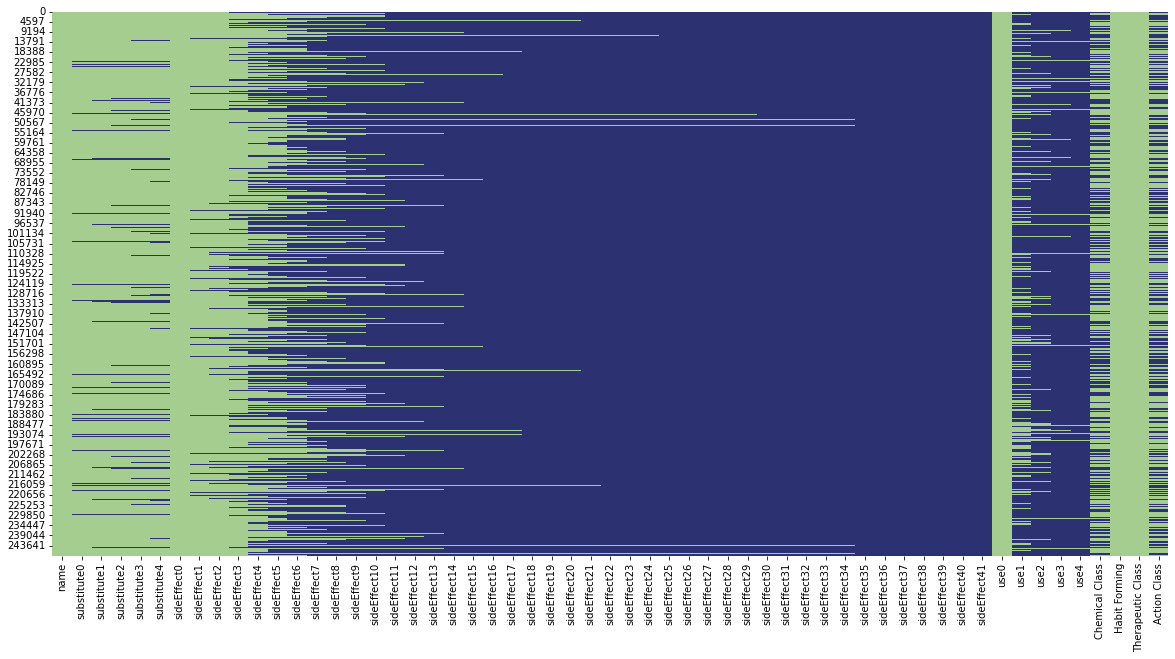

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False, cmap='crest')
plt.show()


2. **Bar Plot**:

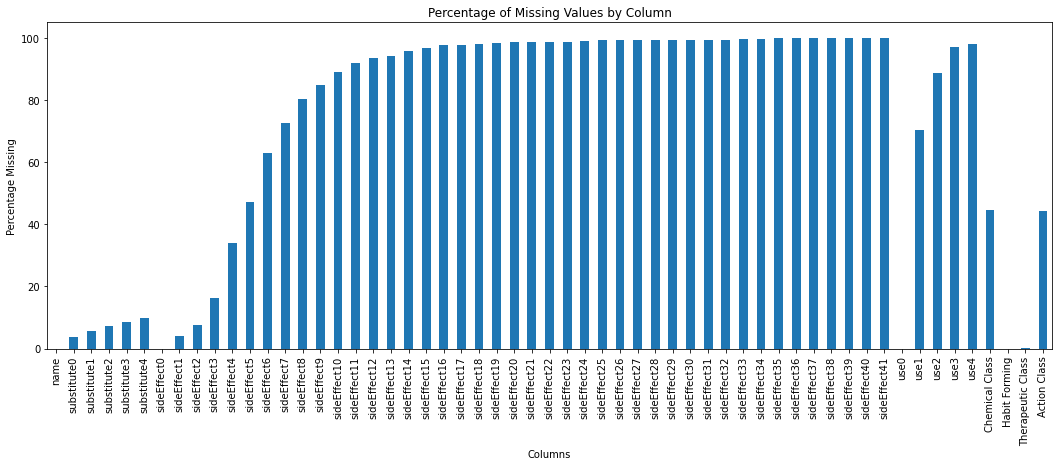

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a bar plot
plt.figure(figsize=(18, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.title('Percentage of Missing Values by Column')
plt.show()

3. **Missingno Summary Statistics**:

<AxesSubplot:>

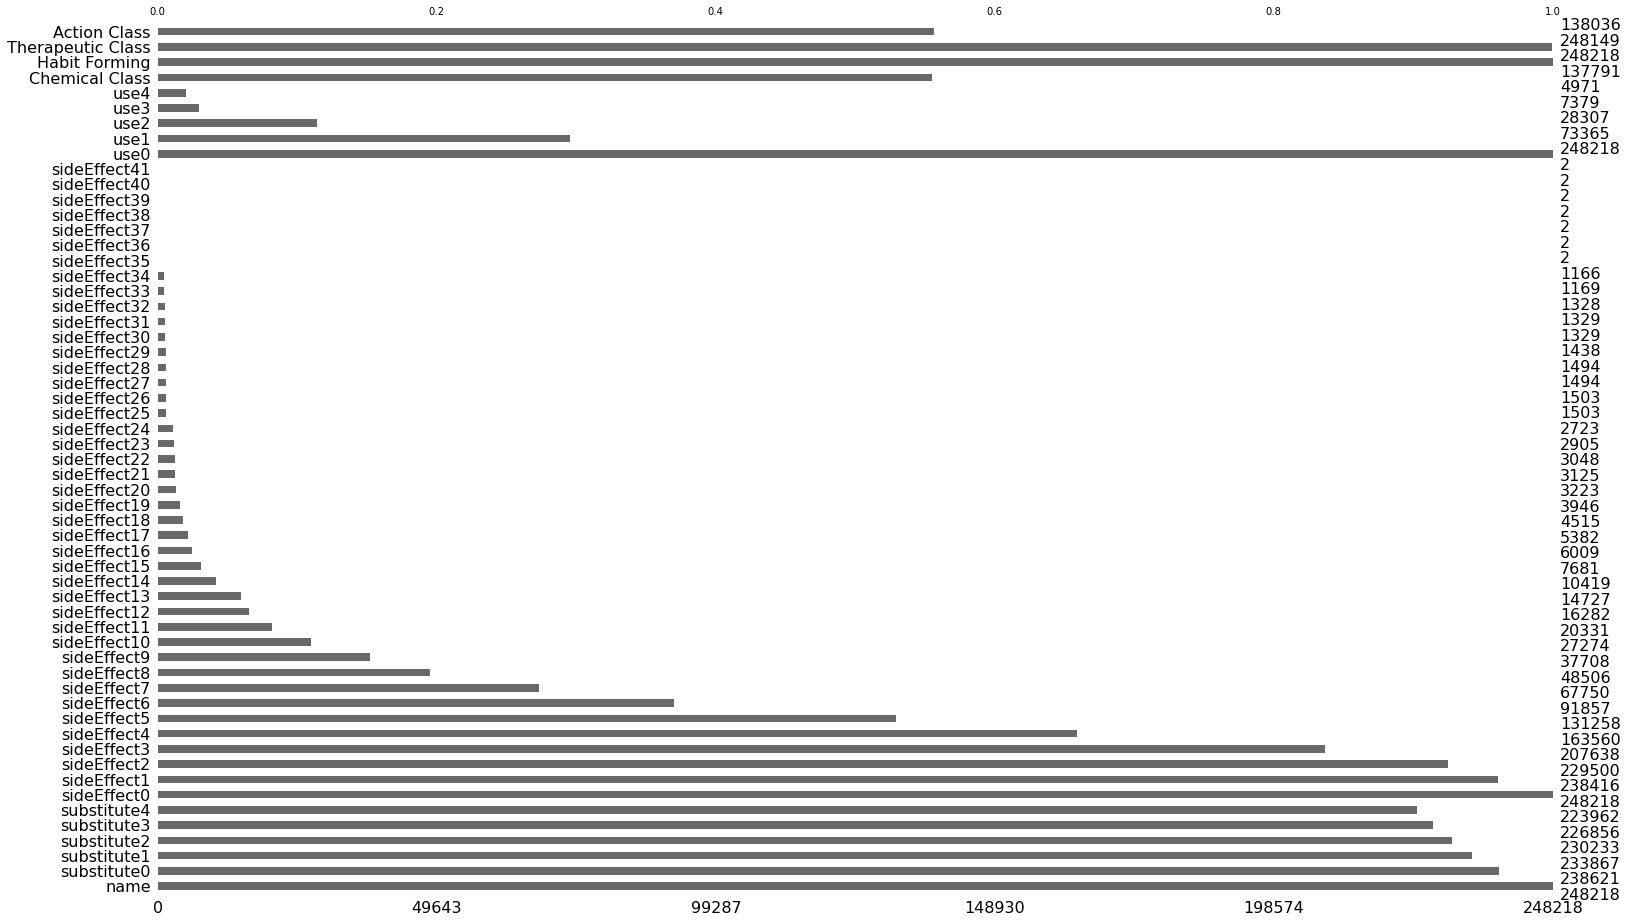

In [10]:
import missingno as msno

# Display missing data summary statistics
msno.bar(data)

## 3. Removing Columns with missing values

In [11]:
# Define the threshold for missing values (more than 55% in this case)
threshold = len(data) * 0.55

# Drop columns with missing values exceeding the threshold
df_cleaned = data.dropna(axis=1, thresh=threshold)

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)


Shape of the cleaned DataFrame: (248218, 16)


### Checking Data Description of reduced Dataset

In [12]:
print("Data types:\n", df_cleaned.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   name               248218 non-null  object
 1   substitute0        238621 non-null  object
 2   substitute1        233867 non-null  object
 3   substitute2        230233 non-null  object
 4   substitute3        226856 non-null  object
 5   substitute4        223962 non-null  object
 6   sideEffect0        248218 non-null  object
 7   sideEffect1        238416 non-null  object
 8   sideEffect2        229500 non-null  object
 9   sideEffect3        207638 non-null  object
 10  sideEffect4        163560 non-null  object
 11  use0               248218 non-null  object
 12  Chemical Class     137791 non-null  object
 13  Habit Forming      248218 non-null  object
 14  Therapeutic Class  248149 non-null  object
 15  Action Class       138036 non-null  object
dtypes: object(16)
memory

### Reduced Dataset

In [13]:
display(df_cleaned.head())

,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,use0,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,NaN,NaN,Treatment of Bacterial infections,NaN,No,ANTI INFECTIVES,NaN
1,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,Macrolides,No,ANTI INFECTIVES,Macrolides
2,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,Stomach pain,Treatment of Cough with mucus,NaN,No,RESPIRATORY,NaN
3,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,NaN,Treatment of Sneezing and runny nose due to allergies,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,NaN,NaN,Treatment of Allergic conditions,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


### Checking Data Statistics

In [14]:
# Setting max column width to avoid truncation of column names
pd.set_option('max_colwidth', 100)

# Creating an empty DataFrame
data_descpt = pd.DataFrame()

# Total number of Parameters (columns) in the dataset
data_descpt["Total Number of Parameters"] = [df_cleaned.shape[1]]

# Checking the number of numerical variables using len() and select_dtypes
data_descpt["Number of Numerical Variables"] = [len(df_cleaned.select_dtypes('number').columns)]

# Checking the number of object (categorical) variables using len() and select_dtypes
data_descpt["Number of Object Variables"] = [len(df_cleaned.select_dtypes('object').columns)]

# # Object columns in the dataset
# data_descpt["Object Columns"] = [data.select_dtypes('object').columns.tolist()] 

# Total number of rows in the dataset
data_descpt["Total Number of Rows"] = [df_cleaned.shape[0]]

# Total number of Cells in the dataset
data_descpt["Total Number of Cells"] = [(df_cleaned.shape[0])*(len(df_cleaned.select_dtypes('object').columns))]

# Calculating the number of missing cells/null values in the dataset
data_descpt["Missing Cells"] = [df_cleaned.isnull().sum().sum()]

# Converting the number of missing cells into a percentage
data_descpt["Missing Cells (%)"] = [(df_cleaned.isnull().sum().sum()) * 100 / (df_cleaned.shape[0] * df_cleaned.shape[1])]

# Calculating the number of duplicate rows in the dataset
data_descpt["Duplicate Rows"] = [df_cleaned.duplicated().sum()]

# Renaming the column name and displaying the DataFrame
display(data_descpt.T.rename(columns={0: 'Dataset Statistics'}))

,Dataset Statistics
Total Number of Parameters,16.00
Number of Numerical Variables,0.00
Number of Object Variables,16.00
Total Number of Rows,248218.00
Total Number of Cells,3971488.00
Missing Cells,461987.00
Missing Cells (%),11.63
Duplicate Rows,24204.00


## 4. Deleting Duplicate rows

In [15]:
df_cleaned = df_cleaned.drop_duplicates()

### Checking Dataset Description after removing duplicate entries

In [16]:
# Setting max column width to avoid truncation of column names
pd.set_option('max_colwidth', 100)

# Creating an empty DataFrame
data_descpt = pd.DataFrame()

# Total number of Parameters (columns) in the dataset
data_descpt["Total Number of Parameters"] = [df_cleaned.shape[1]]

# Checking the number of numerical variables using len() and select_dtypes
data_descpt["Number of Numerical Variables"] = [len(df_cleaned.select_dtypes('number').columns)]

# Checking the number of object (categorical) variables using len() and select_dtypes
data_descpt["Number of Object Variables"] = [len(df_cleaned.select_dtypes('object').columns)]

# # Object columns in the dataset
# data_descpt["Object Columns"] = [data.select_dtypes('object').columns.tolist()] 

# Total number of rows in the dataset
data_descpt["Total Number of Rows"] = [df_cleaned.shape[0]]

# Total number of Cells in the dataset
data_descpt["Total Number of Cells"] = [(df_cleaned.shape[0])*(len(df_cleaned.select_dtypes('object').columns))]

# Calculating the number of missing cells/null values in the dataset
data_descpt["Missing Cells"] = [df_cleaned.isnull().sum().sum()]

# Converting the number of missing cells into a percentage
data_descpt["Missing Cells (%)"] = [(df_cleaned.isnull().sum().sum()) * 100 / (df_cleaned.shape[0] * df_cleaned.shape[1])]

# Calculating the number of duplicate rows in the dataset
data_descpt["Duplicate Rows"] = [df_cleaned.duplicated().sum()]

# Renaming the column name and displaying the DataFrame
display(data_descpt.T.rename(columns={0: 'Dataset Statistics'}))

,Dataset Statistics
Total Number of Parameters,16.00
Number of Numerical Variables,0.00
Number of Object Variables,16.00
Total Number of Rows,224014.00
Total Number of Cells,3584224.00
Missing Cells,418712.00
Missing Cells (%),11.68
Duplicate Rows,0.00


## 5. Checking Missing Data Percentage Column Wise

In [17]:
# Check the missing values (NaN) in each column
missing_values_count = df_cleaned.isnull().sum()

# Percentage of missing values in each attribute
missing_values_percentage = round(df_cleaned.isna().sum() / df_cleaned.isna().count() * 100, 2)

# Create a DataFrame with two columns
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Missing Values Percentage': missing_values_percentage})

missing_values_df

,Missing Values Count,Missing Values Percentage
name,0,0.00
substitute0,8820,3.94
substitute1,13196,5.89
substitute2,16574,7.40
substitute3,19692,8.79
substitute4,22357,9.98
sideEffect0,0,0.00
sideEffect1,9007,4.02
sideEffect2,17015,7.60
sideEffect3,36580,16.33


## 6. Imputing Missing Values 

In [18]:
# Find columns with missing values in the DataFrame
cols_with_missing = df_cleaned.columns[df_cleaned.isnull().any()]

# Impute missing values with the mode for each column
for col in cols_with_missing:
    mode = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode, inplace=True)

# Verify that there are no more missing values in the DataFrame
missing_values = df_cleaned.isnull().sum().sum()
print(f"Total missing values after imputation: {missing_values}")

Total missing values after imputation: 0


In [19]:
# Check the missing values (NaN) in each column
missing_values_count = df_cleaned.isnull().sum()

# Percentage of missing values in each attribute
missing_values_percentage = round(df_cleaned.isna().sum() / df_cleaned.isna().count() * 100, 2)

# Create a DataFrame with two columns
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Missing Values Percentage': missing_values_percentage})

missing_values_df

,Missing Values Count,Missing Values Percentage
name,0,0.00
substitute0,0,0.00
substitute1,0,0.00
substitute2,0,0.00
substitute3,0,0.00
substitute4,0,0.00
sideEffect0,0,0.00
sideEffect1,0,0.00
sideEffect2,0,0.00
sideEffect3,0,0.00


## 7. Cleaned Dataset

In [20]:
display(df_cleaned.head())

,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,use0,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,Diarrhea,Diarrhea,Treatment of Bacterial infections,Fluoroquinolone,No,ANTI INFECTIVES,Cephalosporins: 3 generation
1,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,Diarrhea,Treatment of Bacterial infections,Macrolides,No,ANTI INFECTIVES,Macrolides
2,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,Stomach pain,Treatment of Cough with mucus,Fluoroquinolone,No,RESPIRATORY,Cephalosporins: 3 generation
3,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,Diarrhea,Treatment of Sneezing and runny nose due to allergies,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,avil 25 tablet,Eralet 25mg Tablet,Solitair Tablet,Lecope-M Tablet,Monticope Tablet,Levocet M Tablet,Sleepiness,Dryness in mouth,Diarrhea,Diarrhea,Diarrhea,Treatment of Allergic conditions,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


## 8. Cleaned Dataset Description 

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224014 entries, 0 to 248217
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   name               224014 non-null  object
 1   substitute0        224014 non-null  object
 2   substitute1        224014 non-null  object
 3   substitute2        224014 non-null  object
 4   substitute3        224014 non-null  object
 5   substitute4        224014 non-null  object
 6   sideEffect0        224014 non-null  object
 7   sideEffect1        224014 non-null  object
 8   sideEffect2        224014 non-null  object
 9   sideEffect3        224014 non-null  object
 10  sideEffect4        224014 non-null  object
 11  use0               224014 non-null  object
 12  Chemical Class     224014 non-null  object
 13  Habit Forming      224014 non-null  object
 14  Therapeutic Class  224014 non-null  object
 15  Action Class       224014 non-null  object
dtypes: object(16)
memory usag

# Question 1:

# What is the proportion of habit-forming medicines to non-habit forming medicines?

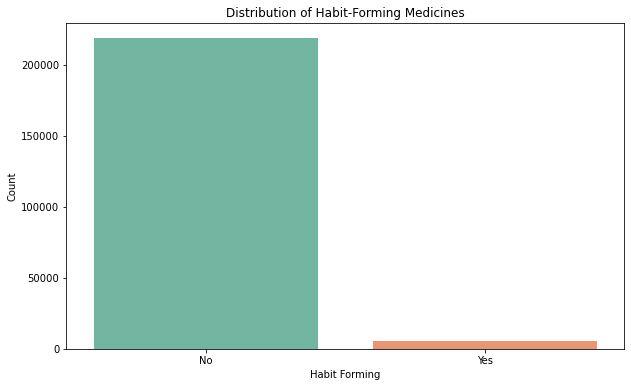

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Habit Forming', palette='Set2')

plt.title("Distribution of Habit-Forming Medicines")
plt.xlabel("Habit Forming")
plt.ylabel("Count")

plt.show()


## Percentage of Habit-Forming Medicines

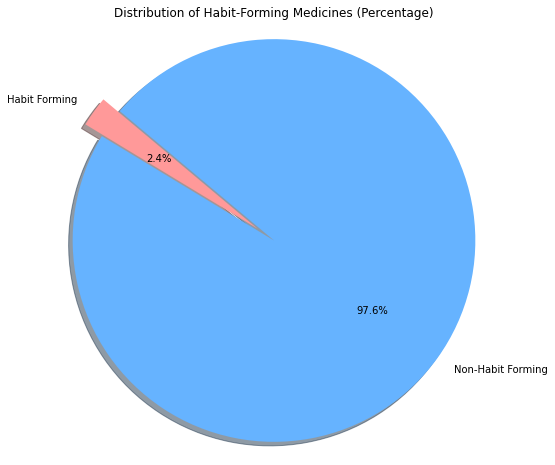

In [23]:
habit_forming_percent = (df_cleaned['Habit Forming'] == 'Yes').mean() * 100
non_habit_forming_percent = (df_cleaned['Habit Forming'] == 'No').mean() * 100

# Create a pie chart
plt.figure(figsize=(8, 8)) 
labels = ['Habit Forming', 'Non-Habit Forming']
sizes = [habit_forming_percent, non_habit_forming_percent]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal') 

plt.title("Distribution of Habit-Forming Medicines (Percentage)")

plt.show()


# Question 2:
# To which chemical class do habit-forming medicines belong?

In [24]:
habit_forming_meds = df_cleaned[df_cleaned['Habit Forming'] == 'Yes']
habit_forming_meds[['name', 'Chemical Class']]

,name,Chemical Class
21,alprax 0.25 tablet,Benzodiazepines Derivative
23,ativan 2mg tablet,Benzodiazepines Derivative
34,ativan 1mg tablet,Benzodiazepines Derivative
38,alprax 0.5mg tablet,Benzodiazepines Derivative
61,amixide-h tablet,Fluoroquinolone
...,...,...
247814,zeropres p 0.25mg/20mg tablet,Fluoroquinolone
247857,zoltweet 0.5mg tablet sr,Benzodiazepines Derivative
247947,zorelax 0.25mg tablet,Benzodiazepines Derivative
248110,zudol 100mg injection,Anisole Derivative


## Visualize the chemical classes of Habit forming Medicines 

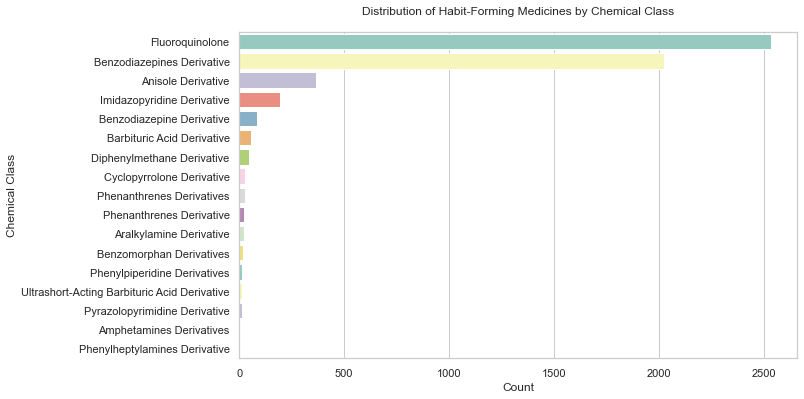

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=habit_forming_meds, y="Chemical Class", order=habit_forming_meds['Chemical Class'].value_counts().index, palette="Set3")
plt.title("Distribution of Habit-Forming Medicines by Chemical Class\n")
plt.xlabel("Count")
plt.ylabel("Chemical Class")
plt.show()


# Question 3:
# What are the most prevalent side effects induced by these medicines?

In [26]:
side_effects = df_cleaned[['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']]

# Combine all side effect columns into a single Series
combined_side_effects = side_effects.stack()

# Find the most common side effect
most_common_side_effect = combined_side_effects.value_counts().idxmax()

print("The most common side effect is:", most_common_side_effect)


The most common side effect is: Diarrhea


# Question 4:
# Identify and list the top 10 most common side effects.

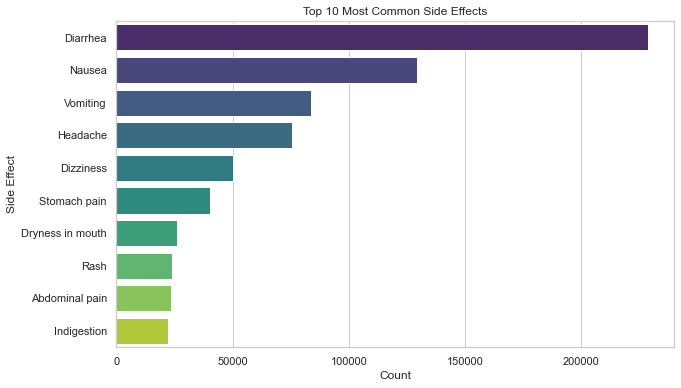

In [27]:
side_effects = df_cleaned[['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']]

# Combine all side effect columns into a single Series
combined_side_effects = side_effects.stack()

# Find the top 10 most common side effects
top_10_side_effects = combined_side_effects.value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_side_effects.values, y=top_10_side_effects.index, palette="viridis")
plt.title("Top 10 Most Common Side Effects")
plt.xlabel("Count")
plt.ylabel("Side Effect")
plt.show()


## Barplot Visualization of Percentage of 10 most common side effects 

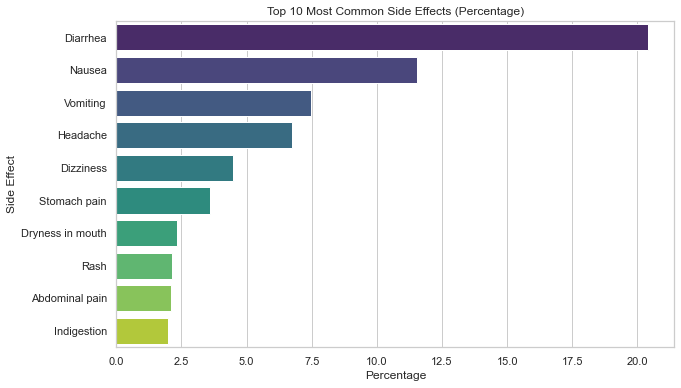

In [28]:
side_effects = df_cleaned[['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']]

# Combine all side effect columns into a single Series
combined_side_effects = side_effects.stack()

# Calculate the top 10 most common side effects and their percentages
top_10_side_effects = (combined_side_effects.value_counts(normalize=True) * 100).nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_side_effects.values, y=top_10_side_effects.index, palette="viridis")
plt.title("Top 10 Most Common Side Effects (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Side Effect")
plt.show()


## PieChart Visualization of Percentage of 10 most common side effects 

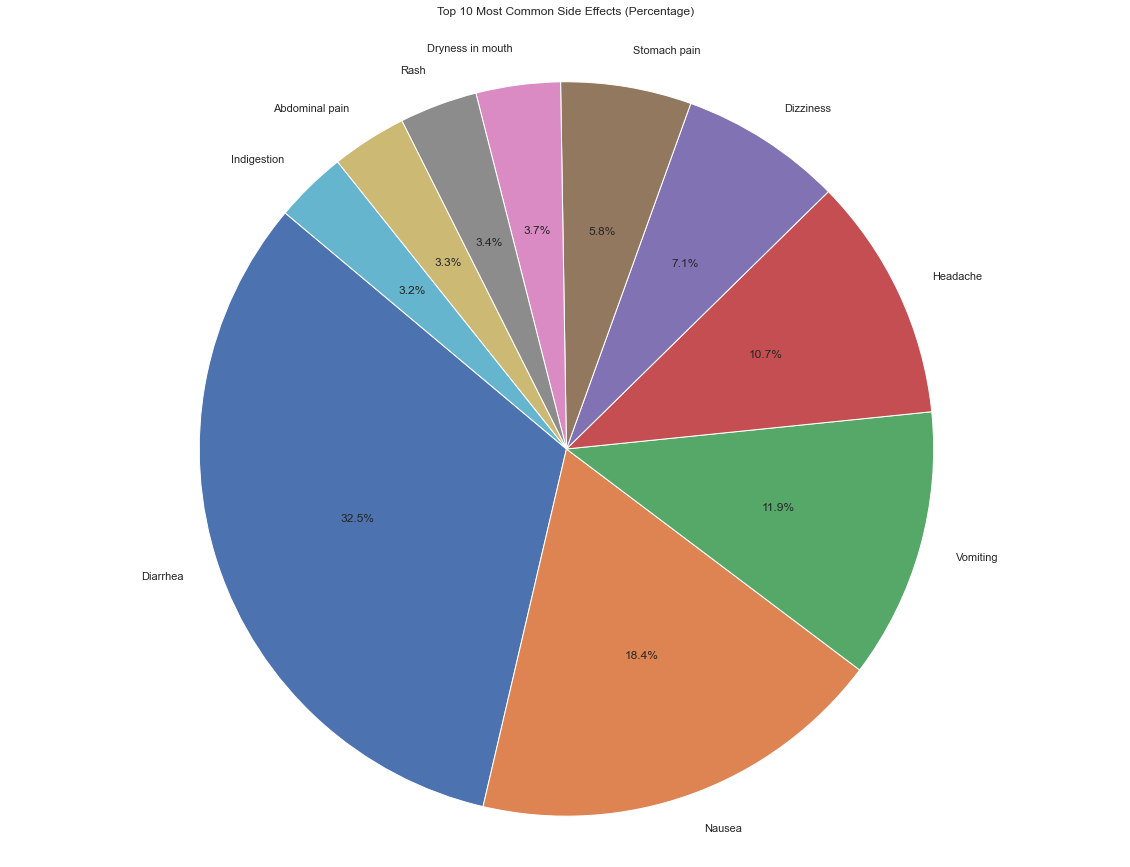

In [29]:
side_effects = df_cleaned[['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']]

# Combine all side effect columns into a single Series
combined_side_effects = side_effects.stack()

# Calculate the top 10 most common side effects and their percentages
top_10_side_effects = (combined_side_effects.value_counts(normalize=True) * 100).nlargest(10)

import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(20, 15))
plt.pie(top_10_side_effects, labels=top_10_side_effects.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Common Side Effects (Percentage)\n\n")

plt.axis('equal')

plt.show()


# Question 5:
# Determine the most frequent use case for these medicines.

In [30]:
most_common_disease = df_cleaned['use0'].value_counts().idxmax()

print("The most common use case of medication is:", most_common_disease)


The most common use case of medication is: Treatment of Bacterial infections


## Visualising the most commonly treated diseases

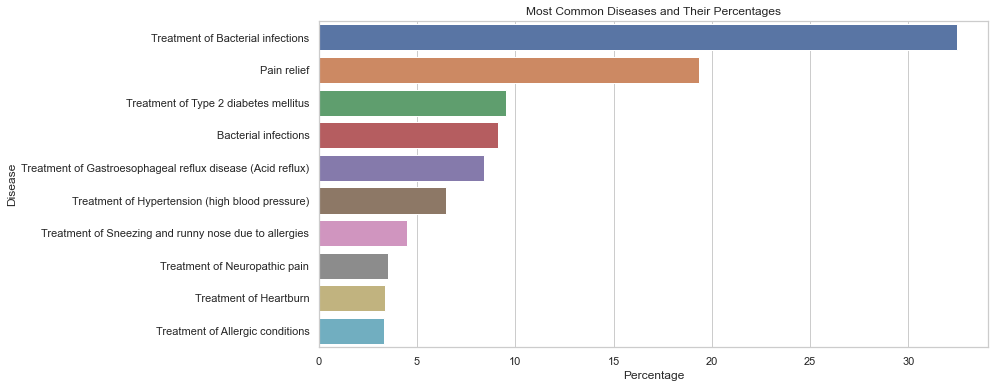

In [31]:
plt.figure(figsize=(12, 6)) 

# Count the occurrences of each disease
disease_counts = (df_cleaned['use0'].value_counts()).nlargest(10)

# Calculate percentages
percentage_values = (disease_counts / disease_counts.sum()) * 100 

# Create a bar plot
ax = sns.barplot(x=percentage_values, y=disease_counts.index, orient='h')
ax.set_xlabel('Percentage')
ax.set_ylabel('Disease')
ax.set_title('Most Common Diseases and Their Percentages')

plt.show()


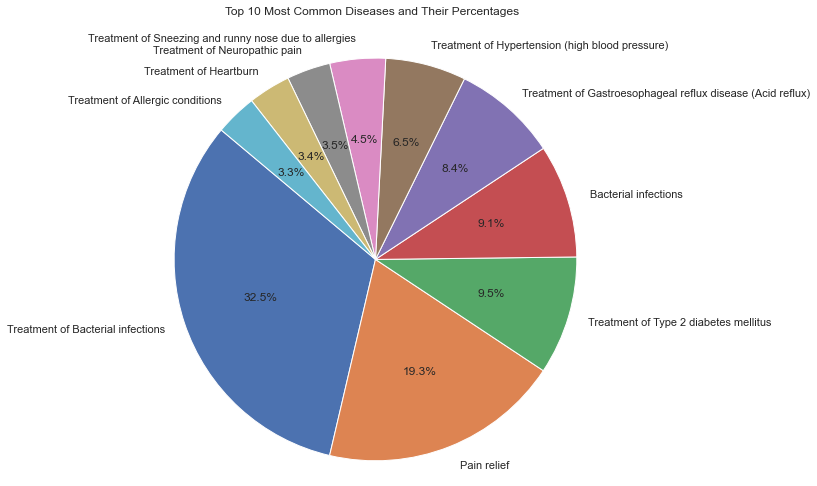

In [32]:
# Select the top 10 most common diseases
top_10_diseases = percentage_values.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(top_10_diseases, labels=top_10_diseases.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Top 10 Most Common Diseases and Their Percentages \n\n')

plt.show()


# Question 6:
# List the 10 most common substitutes used for these medicines.

In [33]:
combined_substitutes = substitutes.stack()

# Count the occurrences of each substitute
substitute_counts = combined_substitutes.value_counts()

# Get the top 10 most common substitutes and their percentages
top_10_substitutes = substitute_counts.head(10)
total_substitutes = len(combined_substitutes)
top_10_substitutes_percentage = (top_10_substitutes / total_substitutes) * 100

# Print the results
print("Top 10 most common substitutes used in medicines and their percentages:")
top_10_substitutes_percentage = pd.DataFrame(top_10_substitutes_percentage)
top_10_substitutes_percentage

NameError: name 'substitutes' is not defined

## Visualizing 10 most common substitutes

In [ ]:
# Get the counts of each substitute
substitute_counts = combined_substitutes.value_counts()

# Get the top 10 most common substitutes
top_10_substitutes = substitute_counts.head(10)

# Plot the top 10 substitutes
plt.figure(figsize=(12, 6))
top_10_substitutes.plot(kind='barh', color='orange')
plt.title("Top 10 Common Substitutes Used in Medicines")
plt.xlabel("Substitute")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

plt.show()


# Question 7:
# Calculate the number of drugs within each Therapeutic Class.

In [ ]:
therapeutic_classes = df_cleaned['Therapeutic Class']

# Count the occurrences of each class
class_counts = therapeutic_classes.value_counts()

# Plot the number of drugs in each class
plt.figure(figsize=(12, 6))
class_counts.plot(kind='barh', color="black")
plt.title('Number of Drugs in Each Therapeutic Class')
plt.xlabel('Therapeutic Class')
plt.ylabel('Number of Drugs')
plt.show()


# Question 8:
# Calculate the number of drugs within each Chemical Class.

In [ ]:
chemical_classes = df_cleaned['Chemical Class']

# Count the occurrences of each class
class_counts = (chemical_classes.value_counts()).nlargest(5)

# Plot the number of drugs in each class
plt.figure(figsize=(12, 6))
class_counts.plot(kind='pie')
plt.title('Number of Drugs in Each Chemical Class\n')
plt.xlabel('Chemical Class')
plt.ylabel('Number of Drugs')
plt.show()


# Question 9:
# Calculate the number of drugs within each Action Class.

In [ ]:
action_classes = df_cleaned['Action Class']

# Count the occurrences of each class
class_counts = (action_classes.value_counts()).nlargest(5)

# Plot the number of drugs in each class
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color="green")
plt.title('Number of Drugs in Each Action Class')
plt.xlabel('Action Class')
plt.ylabel('Number of Drugs')
plt.show()


## Reference

### Dataset
1. https://www.kaggle.com/datasets/shudhanshusingh/250k-medicines-usage-side-effects-and-substitutes/data

### Libraries
1. https://seaborn.pydata.org/
2. https://matplotlib.org/
3. https://pandas.pydata.org/


In [ ]:
import session_info
session_info.show()